In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from langchain.chat_models import ChatOpenAI
from langchain.schema import SystemMessage, HumanMessage
# from langchain_core.pydantic_v1 import BaseModel, Field
from pydantic import BaseModel, Field

from langchain_openai import ChatOpenAI
import os
from dotenv import load_dotenv
from typing import List
from pprint import pprint
sns.set_theme(style="whitegrid")

In [2]:
load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

In [3]:
df = pd.read_csv("data3.csv")

df.head()

,Stream,Student Name,Subject Category,Subject,Subject Strand,Term,Grade,Grade Numeric
0,Yellow,Holly,Languages,English,English Reading,1,B,4
1,Yellow,Holly,Languages,English,English Reading,2,A,5
2,Yellow,Holly,Languages,English,English Reading,3,B,4
3,Yellow,Holly,Languages,English,English Writing,1,A,5
4,Yellow,Holly,Languages,English,English Writing,2,B,4


In [4]:
streams = list(df["Stream"].unique())
student_names = list(df["Student Name"].unique())
subject_categories = list(df["Subject Category"].unique())
subjects = list(df["Subject"].unique())
subject_strands = list(df["Subject Strand"].unique())
terms = list(df["Term"].unique())
grades = list(df["Grade"].unique())


subject_strand_to_subject = {
    "English Reading": "English",
    "English Writing": "English",
    "Vocabulary": "Spanish",
    "Spanish Grammar": "Spanish",
    "Algebra": "Math",
    "Geometry": "Math",
    "Mechanics": "Physics",
    "Thermodynamics": "Physics",
    "Physical Geography": "Geography",
    "Human Geography": "Geography",
    "Ancient History": "History",
    "Medieval History": "History",
}

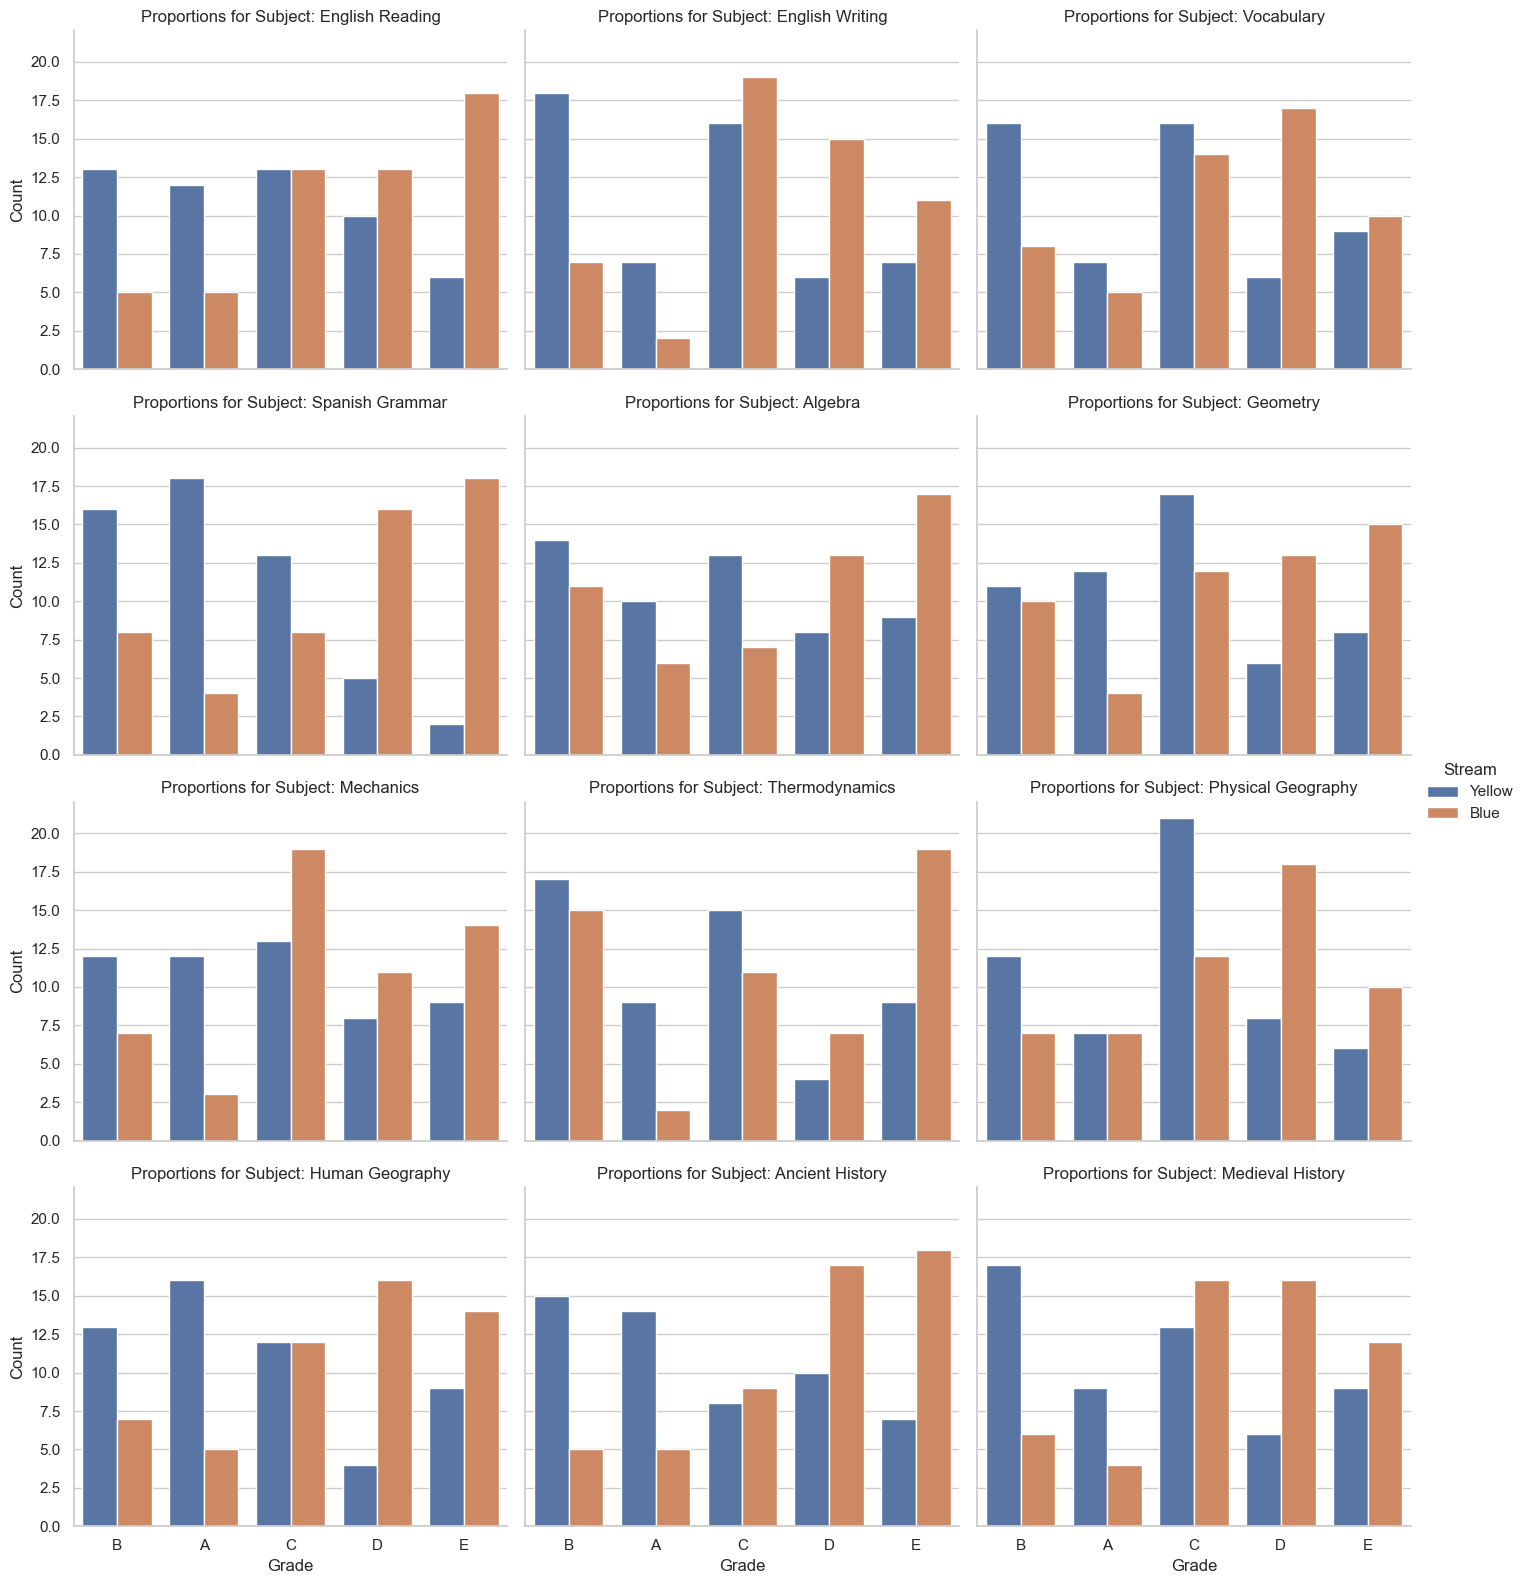

In [80]:
# Get unique subject strands
subject_strands = df["Subject Strand"].unique()
num_strands = len(subject_strands)

# Create a FacetGrid for multiple subject strands
g = sns.catplot(
    data=df,
    x="Grade",
    hue="Stream",
    col="Subject Strand",
    kind="count",
    col_wrap=3,
    height=4,
    aspect=1.2,
)

g.set_titles("Proportions for Subject: {col_name}")
g.set_axis_labels("Grade", "Count")
g.legend.set_title("Stream")

plt.show()


# Grade to Numeric Ranking
- A - 5
- B - 4
- C - 3
- D - 2
- E - 1

# Relative Rank of Grade of a Student as per Class

In [5]:
data = []

for stream in streams:
    # Get specific stream
    stream_df = df[df["Stream"] == stream]

    # Get details of this stream
    student_names = list(stream_df["Student Name"].unique())
    subject_strands = list(stream_df["Subject Strand"].unique())

    # For each student look at how well they did in each subject
    for student_name in student_names:
        student_df = stream_df[stream_df["Student Name"] == student_name]

        for subject_strand in subject_strands:
            subject = subject_strand_to_subject[subject_strand]
            # Get Mean and Median for strean in specific strand

            stream_subject_strand_df = stream_df[
                stream_df["Subject Strand"] == subject_strand
            ]

            stream_subject_strand_mean = stream_subject_strand_df[
                "Grade Numeric"
            ].mean().round(1)

            # stream_subject_strand_median = stream_subject_strand_df[
            #     "Grade Numeric"
            # ].median()

            stream_subject_strand_std = stream_subject_strand_df[
                "Grade Numeric"
            ].std()

            # Get stream mean in a particular strand
            student_subject_strand_df = student_df[
                student_df["Subject Strand"] == subject_strand
            ]

            student_subject_strand_mean = student_subject_strand_df[
                "Grade Numeric"
            ].mean().round(1)

            # student_z_score = (
            #     (student_subject_strand_mean - stream_subject_strand_mean)
            #     / stream_subject_strand_std
            #     # if stream_subject_strand_std != 0
            #     # else 0
            # )

            student_percentile = scipy.stats.percentileofscore(
                stream_subject_strand_df["Grade Numeric"],
                student_subject_strand_mean,
            ).round(1)

            data.append(
                [
                    stream,
                    student_name,
                    subject,
                    subject_strand,
                    student_subject_strand_mean,
                    student_percentile,
                ]
            )


subject_strand_percentile_df = pd.DataFrame(
    data,
    columns=[
        "Stream",
        "Student Name",
        "Subject",
        "Subject Strand",
        "Grade Numeric",
        "Percentile",
    ],
)

display(subject_strand_percentile_df.head(24))
display(subject_strand_percentile_df.tail(24))

,Stream,Student Name,Subject,Subject Strand,Grade Numeric,Percentile
0,Yellow,Holly,English,English Reading,4.3,77.8
1,Yellow,Holly,English,English Writing,4.3,87.0
2,Yellow,Holly,Spanish,Vocabulary,4.7,87.0
3,Yellow,Holly,Spanish,Spanish Grammar,4.3,66.7
4,Yellow,Holly,Math,Algebra,4.7,81.5
5,Yellow,Holly,Math,Geometry,4.7,77.8
6,Yellow,Holly,Physics,Mechanics,4.3,77.8
7,Yellow,Holly,Physics,Thermodynamics,3.7,51.9
8,Yellow,Holly,Geography,Physical Geography,4.0,76.9
9,Yellow,Holly,Geography,Human Geography,5.0,86.1


,Stream,Student Name,Subject,Subject Strand,Grade Numeric,Percentile
396,Blue,Mallory,English,English Reading,1.3,33.3
397,Blue,Mallory,English,English Writing,1.7,20.4
398,Blue,Mallory,Spanish,Vocabulary,3.3,75.9
399,Blue,Mallory,Spanish,Spanish Grammar,1.7,33.3
400,Blue,Mallory,Math,Algebra,2.3,55.6
401,Blue,Mallory,Math,Geometry,4.0,84.3
402,Blue,Mallory,Physics,Mechanics,2.7,46.3
403,Blue,Mallory,Physics,Thermodynamics,2.3,48.1
404,Blue,Mallory,Geography,Physical Geography,4.3,87.0
405,Blue,Mallory,Geography,Human Geography,2.3,55.6


For some students, having around 3 makes them in the middle of their class wo in th 75th percentile.

# Using LLM for getting strengths and weaknesses of student

In [11]:
class Recommendation(BaseModel):
    stream: str = Field(description="The class the student is in")
    name: str = Field(description="The student's name")
    subject: str = Field(description="The subject")
    subject_strand: str = Field(description="The specific topic within the subject")
    grade_numeric: float = Field(description="The grade bound between 1 and 5")
    percentile: float = Field(description="Percentile of student")
    strength_or_weakness: str = Field(
        description="Describe if the student is strong or weak relative to class, use percentile"
    )
    recommendations: str = Field(
        description="A generic recommendation on what they should do. Maybe focus on another strand within the subject or focus on another subject altogether"
    )


class RecommendationList(BaseModel):
    recommendations: List[Recommendation]


model = "gpt-4o-mini-2024-07-18"
model_kwargs = {"response_format": {"type": "json_schema"}}

# model = "gpt-3.5-turbo"
# llm = ChatOpenAI(model="gpt-4o-mini-2024-07-18")
llm = ChatOpenAI(model=model, model_kwargs=model_kwargs)
# llm_with_structured_output = llm.with_structured_output(RecommendationList)

messages = [
    SystemMessage(
        content="""
        You are an AI assistant helping me categorize the streghts and weaknesses of each student relative to their stream.
        The grade numeric is from 1 to 5.
        The percentile is there too. This is because 
        """
    ),
    HumanMessage(
        content=f"""
        Here is some tabular data:\n{subject_strand_percentile_df.to_string()}
        
        Can you summarize it?
        
        Give me a list of json objects looking lke the followng
        
        {{
            "recommendations": [
                {{
                    "stream": "Science",
                    "name": "Alice",
                    "subject": "Math",
                    "subject_strand": "Algebra",
                    "grade_numeric": 4.5,
                    "percentile": 85,
                    "strength_or_weakness": "Strong",
                    "recommendations": "Continue with advanced topics."
                }}
            ]
        }}

        """
    ),
]

output = llm.invoke(messages)
# output = llm_with_structured_output.invoke(messages)

RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

In [99]:
pprint(output.content)

("Sure! Here's a summarized classification of the students' strengths and "
 'weaknesses based on their grades and percentiles across different subjects.\n'
 '\n'
 '### Stream Yellow:\n'
 '\n'
 '#### Strengths:\n'
 '- **Holly**: Strong performance in Spanish Vocabulary (4.7, 87.0) and '
 'Geography Human Geography (5.0, 86.1).\n'
 '- **Jon**: Excellent in Spanish Vocabulary (5.0, 94.4) and Physics '
 'Thermodynamics (5.0, 92.6).\n'
 '- **Matthew**: Best performance in Spanish Grammar (4.2, 66.7).\n'
 '- **Johnny**: Strong in Math Geometry (4.7, 77.8) and good in Geography '
 'Physical Geography (4.0, 76.9).\n'
 '- **Emily**: History Ancient History and Medieval History (4.0, 61.1 and '
 '4.0, 68.5).\n'
 '- **Rita**: Strong in Math Algebra (4.7, 81.5).\n'
 '- **Virginia**: Geography Human Geography (3.7, 64.8) and good performance '
 'in some subjects.\n'
 '- **Sarah**: Strong in History Ancient History and Medieval History (4.0, '
 '61.1 and 4.0, 68.5).\n'
 '- **Jennifer**: Good in Geo